#### In this step, we will read both the datasets (Fake.csv, True.csv) perform some data cleaning, merge both the datasets and shuffle the final dataset.

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

df_fake = pd.read_csv("E:\Fake.csv")
df_fake.head()

[nltk_data] Downloading package stopwords to C:\Users\digvijay
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [2]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

#### As we only need title and text, so we will drop extra features i.e., subject and date.

In [3]:
# dropping unneccesary features
df_fake=df_fake.drop(['subject','date'],axis=1)

# assigning label 'FAKE' by creating target column i.e., label
df_fake['label'] ='FAKE' 

df_fake.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,FAKE


#### Similarly, we will be processing the True dataset and further merging it with the df_fake data frame to create the final dataset.

In [4]:
df_true = pd.read_csv("E:\True.csv")
df_true=df_true.drop(['subject','date'],axis=1)
df_true['label']='TRUE'

df= pd.concat([df_true, df_fake], ignore_index=True)
df.head()

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,TRUE


#### So, we have merged the dataset, but the dataset has a defined sequence of True and Fake labels. So, therefore we need to shuffle the dataset to introduce a randomness in the dataset.

In [5]:
#shuffling the dataset
df=df.reindex(np.random.permutation(df.index))
df.head()

,title,text,label
17752,UK government softens immigration rules for Gr...,LONDON (Reuters) - Illegal immigrants who surv...,TRUE
32399,BOMBSHELL BIOGRAPHY: “SELF-OBSESSED” BARACK OB...,The sex secrets of the young Barack Obama have...,FAKE
6892,"After hesitation, Carson accepts Trump's offer...",WASHINGTON (Reuters) - Retired neurosurgeon Be...,TRUE
29690,You Won’t Believe The Mailer The Rubio Campai...,The Republican presidential race has gotten so...,FAKE
5725,Trump discusses safe zones in Syria with Jorda...,WASHINGTON (Reuters) - U.S. President Donald T...,TRUE


#### From the dataset, we can observe that True news text contains the source of the news also i.e., 3rd row of True News text starts from BERLIN (Reuters) –, whereas 4th row of True News text starts from (Reuters) –

#### So, we have to clean the True News text as it affects the model building process as it’s not an important feature for building a fake news detection model.

#### Therefore, we have to write look ahead regular expression to retain only the text followed by “(Reuters) –“. The code for regular expression-based extraction is shared below:

In [6]:
import re
# function for extracting desired text using regex
def extract_txt(text):
    regex = re.search(r"(?<=\(Reuters\)\s\-\s).*",text)
    if regex:
        return regex.group(0)
    return text
#applying regex function to retain only relevant text
df['text_processed'] = df['text'].apply(extract_txt)

#checking dataframe containing only True News
df[df.label=="TRUE"]

,title,text,label,text_processed
17752,UK government softens immigration rules for Gr...,LONDON (Reuters) - Illegal immigrants who surv...,TRUE,Illegal immigrants who survived a fire that ki...
6892,"After hesitation, Carson accepts Trump's offer...",WASHINGTON (Reuters) - Retired neurosurgeon Be...,TRUE,"Retired neurosurgeon Ben Carson, a rival-turne..."
5725,Trump discusses safe zones in Syria with Jorda...,WASHINGTON (Reuters) - U.S. President Donald T...,TRUE,U.S. President Donald Trump discussed with Jor...
20508,Israeli jets break sound barrier in south Leba...,BEIRUT (Reuters) - Israeli jets flew low over ...,TRUE,Israeli jets flew low over the city of Saida i...
20052,Turkey feels betrayed over EU accession but st...,LONDON (Reuters) - Turkey feels betrayed by so...,TRUE,Turkey feels betrayed by some European Union l...
...,...,...,...,...
9800,Sexual abuse accuser sues ex-House Speaker Has...,(Reuters) - A man who accused former U.S. Hous...,TRUE,A man who accused former U.S. House Speaker De...
10140,"Scranton, Pennsylvania to sell sewer utility f...",(Reuters) - The financially distressed city of...,TRUE,"The financially distressed city of Scranton, P..."
797,U.S. attorney general due to face Democrats' R...,WASHINGTON (Reuters) - U.S. Attorney General J...,TRUE,U.S. Attorney General Jeff Sessions is due to ...
9360,"Trump tower in Canada close to sale, future of...",TORONTO (Reuters) - Toronto’s Trump tower is c...,TRUE,"Toronto’s Trump tower is close to being sold, ..."


#### So, as we can see from the above dataset, the text with the True label is cleaned now. Next, we will be using this combined dataset for building the LSTM model.

## Data Cleaning & Preparation

#### Firstly we will convert the target variable label into binary variable 0 for True news and 1 for Fake news.

In [7]:

#df["label"] = df.label.apply(lambda  x:0 if x=='TRUE' else 1)
#df.head()
df["label"]=encoder.fit_transform(df["label"])
df

,title,text,label,text_processed
17752,UK government softens immigration rules for Gr...,LONDON (Reuters) - Illegal immigrants who surv...,1,Illegal immigrants who survived a fire that ki...
32399,BOMBSHELL BIOGRAPHY: “SELF-OBSESSED” BARACK OB...,The sex secrets of the young Barack Obama have...,0,The sex secrets of the young Barack Obama have...
6892,"After hesitation, Carson accepts Trump's offer...",WASHINGTON (Reuters) - Retired neurosurgeon Be...,1,"Retired neurosurgeon Ben Carson, a rival-turne..."
29690,You Won’t Believe The Mailer The Rubio Campai...,The Republican presidential race has gotten so...,0,The Republican presidential race has gotten so...
5725,Trump discusses safe zones in Syria with Jorda...,WASHINGTON (Reuters) - U.S. President Donald T...,1,U.S. President Donald Trump discussed with Jor...
...,...,...,...,...
43580,CLOAKED ORDER: Who’s Really Behind ‘New Author...,"21st Century Wire says Earlier this week, the ...",0,"21st Century Wire says Earlier this week, the ..."
797,U.S. attorney general due to face Democrats' R...,WASHINGTON (Reuters) - U.S. Attorney General J...,1,U.S. Attorney General Jeff Sessions is due to ...
9360,"Trump tower in Canada close to sale, future of...",TORONTO (Reuters) - Toronto’s Trump tower is c...,1,"Toronto’s Trump tower is close to being sold, ..."
9612,London's mayor an exception to proposed ban on...,WASHINGTON/LONDON (Reuters) - Republican presi...,1,Republican presidential candidate Donald Trump...


#### As we have to analyze the whole news article so we have to combine both title and text_processed features. Further, we have to drop unnecessary features i.e., title, text, and text_processed features from the dataset as we have to use only the final combined news column for building the model.

In [8]:
#combining text_processed and title for creating full news article with headline
df['final_news'] = df['title'] + " " + df['text_processed']

# now we can delete extra columns 
cols_del =['title','text','text_processed']
df = df.drop(cols_del,axis=1)

df.head()

,label,final_news
17752,1,UK government softens immigration rules for Gr...
32399,0,BOMBSHELL BIOGRAPHY: “SELF-OBSESSED” BARACK OB...
6892,1,"After hesitation, Carson accepts Trump's offer..."
29690,0,You Won’t Believe The Mailer The Rubio Campai...
5725,1,Trump discusses safe zones in Syria with Jorda...


#### In the next step, lowercase the data, although it is commonly overlooked, it is one of the most effective techniques when the data is small. Although the word ‘Good’, ‘good’ and ‘GOOD’ are the same but the neural net model will assign different weights to it resulting in abrupt output which will affect the overall performance of the model.

In [9]:
#creating list of possible stopwords from nltk library
stop = stopwords.words('english')

def cleanText(txt):
  # lowercaing
    txt = txt.lower()
  # removing stopwords
    txt = ' '.join([word for word in txt.split() if word not in (stop)])
  # removing non-alphabetic characters
    txt = re.sub('[^a-z]',' ',txt)
    return txt  

#applying text cleaning function to clean final_news
df['final_news'] = df['final_news'].apply(cleanText)
df.head()

,label,final_news
17752,1,uk government softens immigration rules grenfe...
32399,0,bombshell biography self obsessed barack ob...
6892,1,hesitation carson accepts trump s offer head ...
29690,0,won t believe mailer rubio campaign sent jeb b...
5725,1,trump discusses safe zones syria jordan s king...


In [10]:
df.isnull().sum()

label         0
final_news    0
dtype: int64

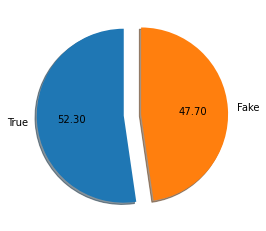

In [11]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['True','Fake'],explode = (0.1, 0.1),autopct="%0.2f",shadow=True,startangle=90)
plt.show()

In [12]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\digvijay
[nltk_data]     singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
df['num_characters']=df['final_news'].apply(len)

In [14]:
df.head()

,label,final_news,num_characters
17752,1,uk government softens immigration rules grenfe...,2387
32399,0,bombshell biography self obsessed barack ob...,3276
6892,1,hesitation carson accepts trump s offer head ...,4284
29690,0,won t believe mailer rubio campaign sent jeb b...,1473
5725,1,trump discusses safe zones syria jordan s king...,377


In [15]:
df['num_words']=df['final_news'].apply(lambda x:len(nltk.word_tokenize(x)))

In [16]:
df.head()

,label,final_news,num_characters,num_words
17752,1,uk government softens immigration rules grenfe...,2387,299
32399,0,bombshell biography self obsessed barack ob...,3276,464
6892,1,hesitation carson accepts trump s offer head ...,4284,552
29690,0,won t believe mailer rubio campaign sent jeb b...,1473,207
5725,1,trump discusses safe zones syria jordan s king...,377,56


In [17]:
df['num_sentences']=df['final_news'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [18]:
df.tail()

,label,final_news,num_characters,num_words,num_sentences
43580,0,cloaked order who s really behind new author...,3447,455,1
797,1,u s attorney general due face democrats russ...,2166,273,1
9360,1,trump tower canada close sale future name que...,1742,241,1
9612,1,london s mayor exception proposed ban muslims ...,1820,242,1
35497,0,decision liberal judge connecticut make could ...,3018,395,1


In [19]:
df[['num_characters','num_words']].describe()

,num_characters,num_words
count,44898.000000,44898.000000
mean,1886.217783,252.909484
std,1622.053851,213.458390
min,29.000000,3.000000
25%,979.000000,133.000000
50%,1659.000000,224.000000
75%,2347.750000,315.000000
max,40262.000000,5134.000000


In [20]:
df[df['label']==0][['num_characters','num_words']].describe()

,num_characters,num_words
count,23481.000000,23481.000000
mean,1921.092543,259.951322
std,1886.032295,247.075294
min,29.000000,3.000000
25%,1118.000000,154.000000
50%,1624.000000,222.000000
75%,2260.000000,306.000000
max,40262.000000,5134.000000


In [21]:
df[df['label']==1][['num_characters','num_words']].describe()

,num_characters,num_words
count,21417.000000,21417.000000
mean,1847.982070,245.189009
std,1270.069483,168.756759
min,30.000000,4.000000
25%,735.000000,98.000000
50%,1719.000000,227.000000
75%,2480.000000,328.000000
max,19894.000000,2730.000000


In [22]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

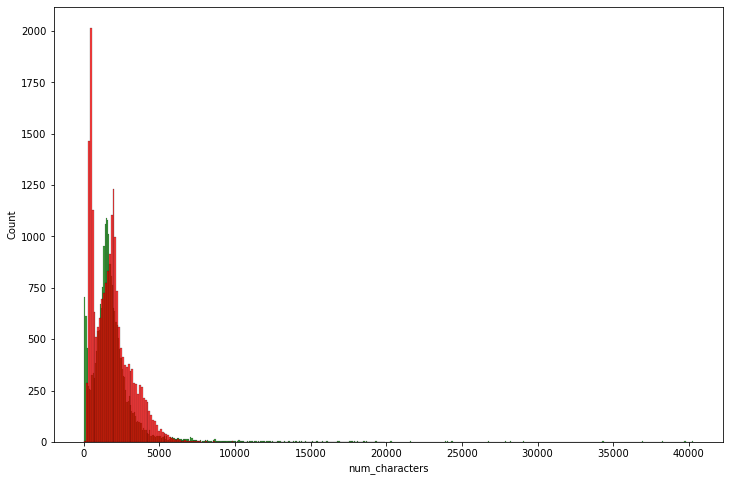

In [23]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['label']==0]['num_characters'],color='green')
sns.histplot(df[df['label']==1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

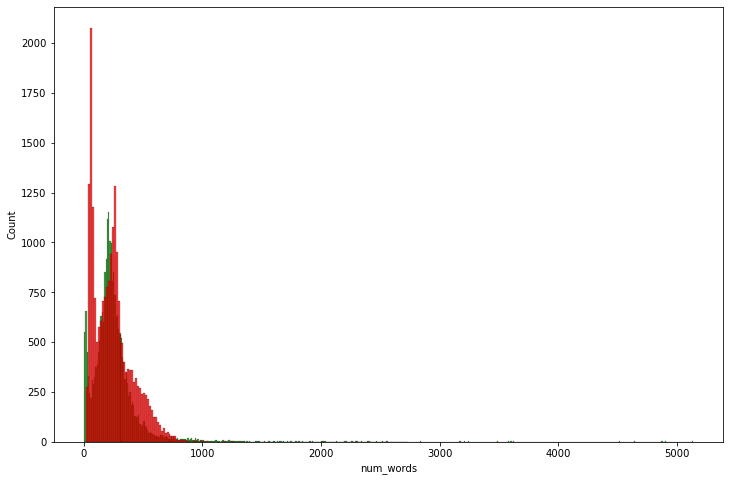

In [24]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['label']==0]['num_words'],color='green')
sns.histplot(df[df['label']==1]['num_words'],color='red')

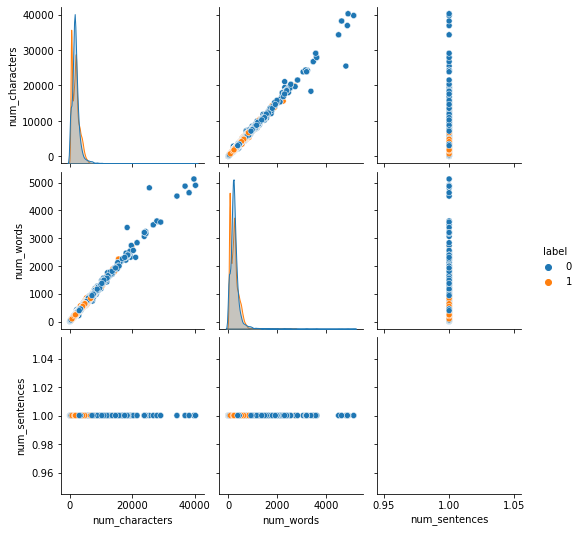

In [25]:
sns.pairplot(df,hue='label')

<AxesSubplot:>

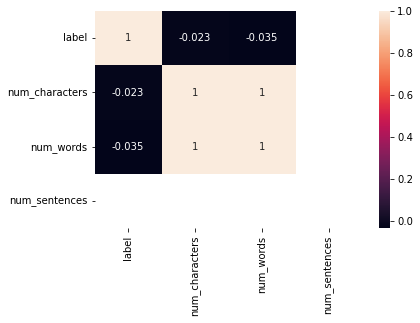

In [26]:
sns.heatmap(df.corr(),annot=True)

In [27]:
from nltk.stem import PorterStemmer,SnowballStemmer
from collections import Counter
import string
ps = PorterStemmer()

In [28]:
def transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]        
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [29]:
spam_corpus= []
for msg in df[df['label']==1]['final_news'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [30]:
len(spam_corpus)

5249690

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


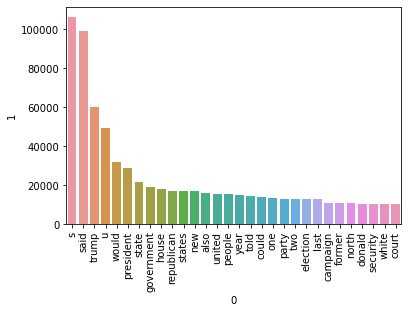

In [31]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [32]:
ham_corpus = []
for msg in df[df['label'] == 0]['final_news'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [33]:
len(ham_corpus)

6100942

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


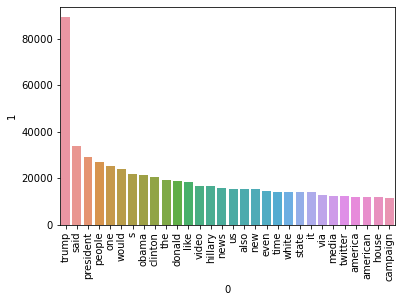

In [34]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [35]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [36]:
X = tfidf.fit_transform(df['final_news']).toarray()

In [37]:
X.shape

(44898, 3000)

In [38]:
y = df['label'].values

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [41]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [48]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [43]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9221603563474388
[[4512  259]
 [ 440 3769]]
0.935700099304866


In [50]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred2 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9481069042316258
[[4499  272]
 [ 194 4015]]
0.9365523676230464


In [45]:
mnb.fit(X_train,y_train)
y_pred3 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9278396436525612
[[4483  288]
 [ 360 3849]]
0.9303843364757071


In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
LR= LogisticRegression()
LR.fit(X_train,y_train)
y_pred4 = LR.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.9853006681514477
[[4690   81]
 [  51 4158]]
0.9808917197452229
